<a href="https://colab.research.google.com/github/manusports/ASAP/blob/main/mysql_crud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MySQL

### Q: Implement the code to build the below database for the International Language School via Python using MySQL Connector.

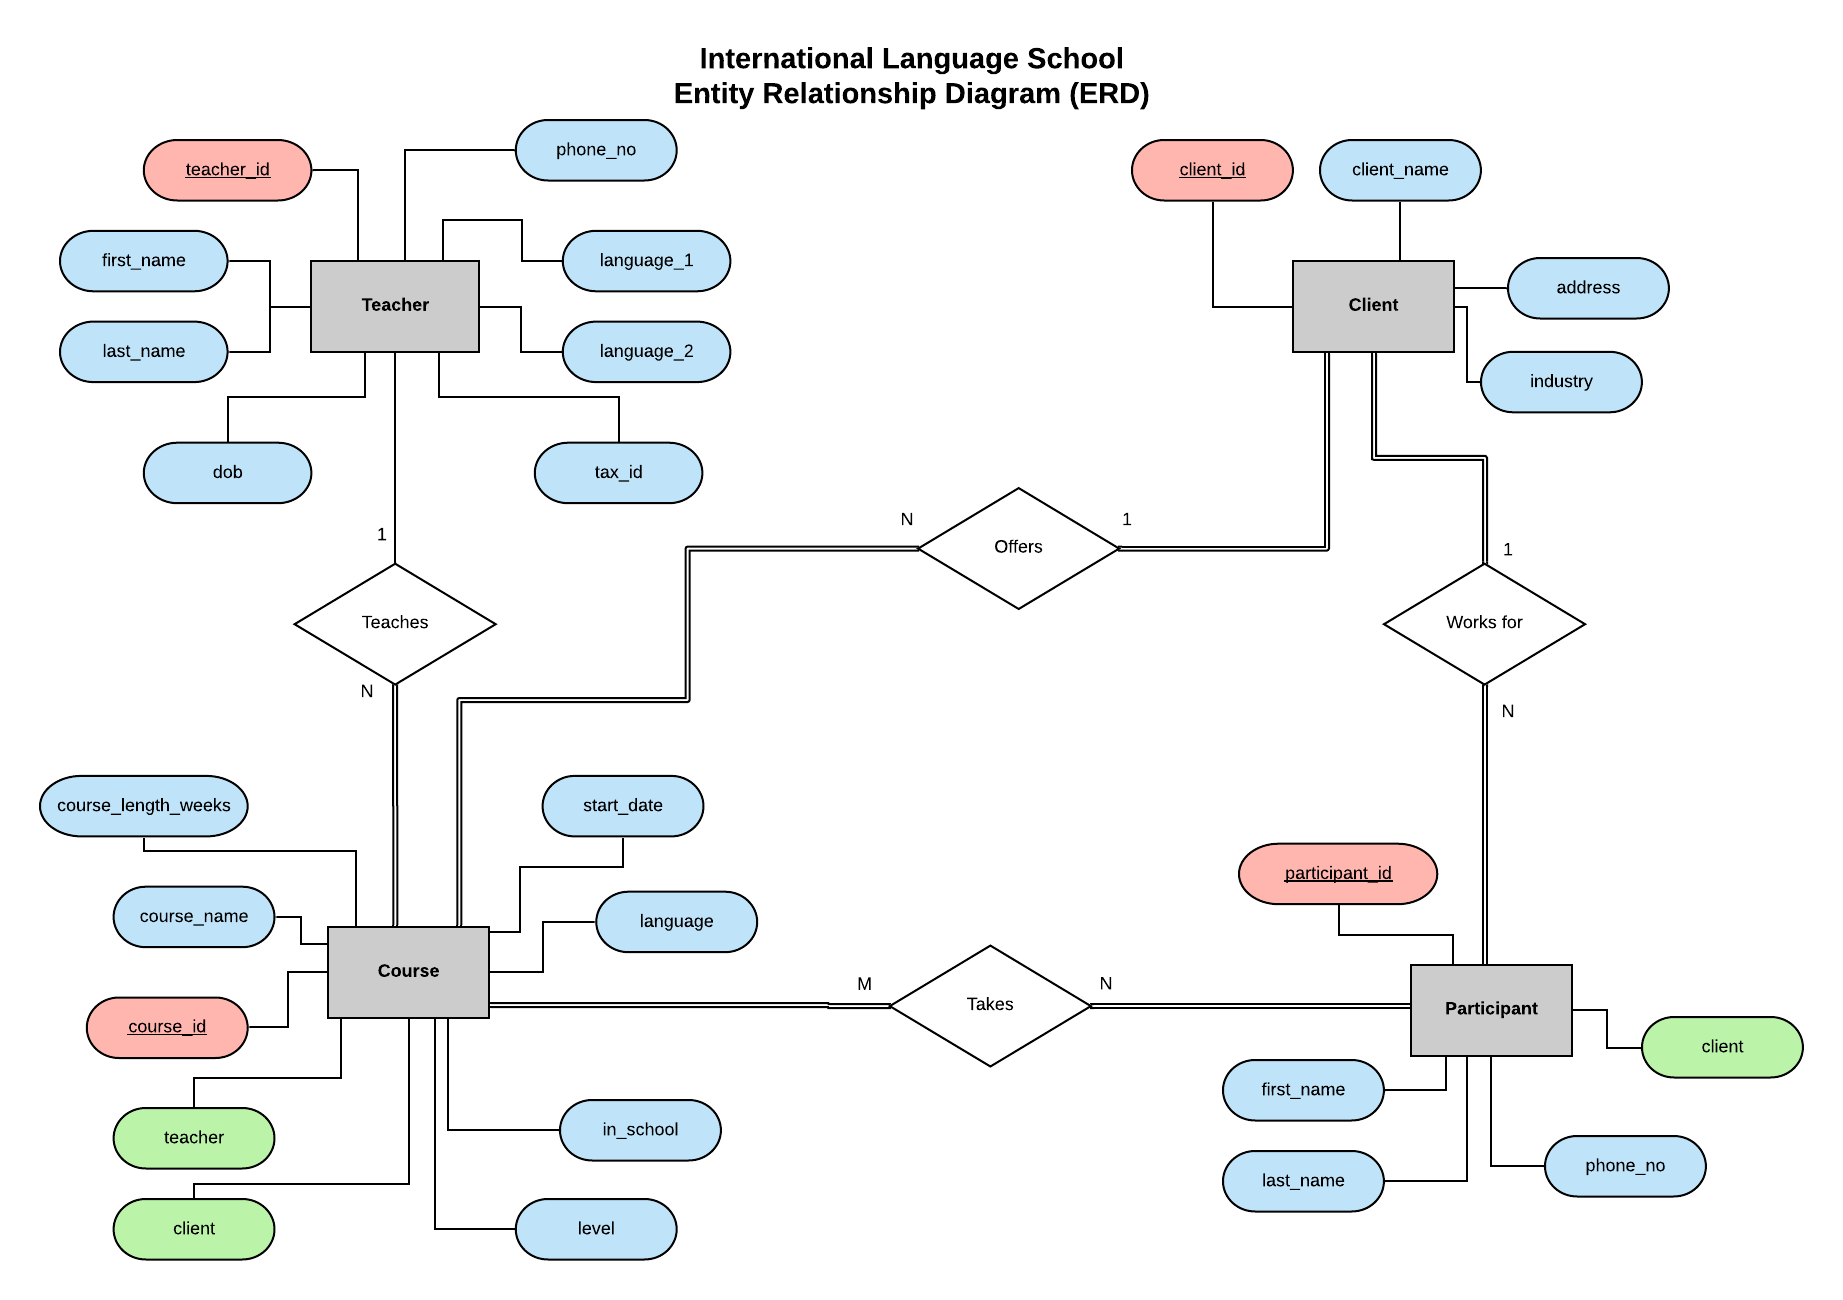

#### Import Libraries

In [1]:
!pip3 install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.4 MB 1.2 MB/s 


In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

-------------------

### Connect to Server 

##### Define Server Connection Function 



In [3]:
host_name="bjmyp18rqrpwhoera08p-mysql.services.clever-cloud.com"
user_name="u5i5alatdmmm1gwr"
user_password="hXRxN19oHW2XD2Ln4ENP"
db = "bjmyp18rqrpwhoera08p"

##### Define Query Execution Function

In [4]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [5]:

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

-------------------

### Creating Tables

##### Create Teacher Table


In [6]:
# Assign our SQL command to a python variable using triple quotes to create a multi-line string
create_teacher_table = """
CREATE TABLE teacher (
  teacher_id INT PRIMARY KEY,
  first_name VARCHAR(40) NOT NULL,
  last_name VARCHAR(40) NOT NULL,
  language_1 VARCHAR(3) NOT NULL,
  language_2 VARCHAR(3),
  dob DATE,
  tax_id INT UNIQUE,
  phone_no VARCHAR(20)
  );
 """

connection = create_db_connection(host_name, user_name, user_password, db) # Connect to the Database
execute_query(connection, create_teacher_table) # Execute our defined query

MySQL Database connection successful
Error: '1050 (42S01): Table 'teacher' already exists'




##### Create Remaining Tables



In [7]:
create_client_table = """
CREATE TABLE client (
  client_id INT PRIMARY KEY,
  client_name VARCHAR(40) NOT NULL,
  address VARCHAR(60) NOT NULL,
  industry VARCHAR(20)
);
 """

create_participant_table = """
CREATE TABLE participant (
  participant_id INT PRIMARY KEY,
  first_name VARCHAR(40) NOT NULL,
  last_name VARCHAR(40) NOT NULL,
  phone_no VARCHAR(20),
  client INT
);
"""

create_course_table = """
CREATE TABLE course (
  course_id INT PRIMARY KEY,
  course_name VARCHAR(40) NOT NULL,
  language VARCHAR(3) NOT NULL,
  level VARCHAR(2),
  course_length_weeks INT,
  start_date DATE,
  in_school BOOLEAN,
  teacher INT,
  client INT
);
"""


connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, create_client_table)
execute_query(connection, create_participant_table)
execute_query(connection, create_course_table)

MySQL Database connection successful
Error: '1050 (42S01): Table 'client' already exists'
Error: '1050 (42S01): Table 'participant' already exists'
Error: '1050 (42S01): Table 'course' already exists'


##### Define Foreign Key Relationships



In [9]:
alter_participant = """
ALTER TABLE participant
ADD FOREIGN KEY(client)
REFERENCES client(client_id)
ON DELETE SET NULL;
"""

alter_course = """
ALTER TABLE course
ADD FOREIGN KEY(teacher)
REFERENCES teacher(teacher_id)
ON DELETE SET NULL;
"""

alter_course_again = """
ALTER TABLE course
ADD FOREIGN KEY(client)
REFERENCES client(client_id)
ON DELETE SET NULL;
"""

create_takescourse_table = """
CREATE TABLE takes_course (
  tid INT
  participant_id INT,
  course_id INT,
  PRIMARY KEY(tid),
  FOREIGN KEY(participant_id) REFERENCES participant(participant_id) ON DELETE CASCADE, -- it makes no sense to keep this rtelation when a participant or course is no longer in the system, hence why CASCADE this time
  FOREIGN KEY(course_id) REFERENCES course(course_id) ON DELETE CASCADE
);
"""

connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, alter_participant)
execute_query(connection, alter_course)
execute_query(connection, alter_course_again)
execute_query(connection, create_takescourse_table)


MySQL Database connection successful
Query successful
Query successful
Query successful
Error: '1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'participant_id INT,
  course_id INT,
  PRIMARY KEY(tid),
  FOREIGN KEY(participa' at line 3'


-----------------

### Populate Tables


##### Populate Teacher Table



In [10]:
pop_teacher = """
INSERT INTO teacher VALUES
(1,  'James', 'Smith', 'ENG', NULL, '1985-04-20', 12345, '+491774553676'),
(2, 'Stefanie',  'Martin',  'FRA', NULL,  '1970-02-17', 23456, '+491234567890'), 
(3, 'Steve', 'Wang',  'MAN', 'ENG', '1990-11-12', 34567, '+447840921333'),
(4, 'Friederike',  'Müller-Rossi', 'DEU', 'ITA', '1987-07-07',  45678, '+492345678901'),
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', '1963-05-30',  56789, '+491772635467'),
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', '1995-09-08',  67890, '+491231231232');
"""

connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, pop_teacher)

MySQL Database connection successful
Query successful



##### 4.2 - Populate Remaining Tables



In [11]:
pop_client = """
INSERT INTO client VALUES
(10, 'eCommerce GmbH', '27 Ersatz Allee, 10317 Berlin', 'Retail'),
(11, 'AutoMaker AG',  '20 Künstlichstraße, 10023 Berlin', 'Auto'),
(12, 'Banko Bank',  '12 Betrugstraße, 12345 Berlin', 'Banking'),
(13, 'WeMoveIt GmbH', '138 Arglistweg, 10065 Berlin', 'Logistics');
"""

pop_participant = """
INSERT INTO participant VALUES
(101, 'Marina', 'Berg','491635558182', 10),
(102, 'Andrea', 'Duerr', '49159555740', 11),
(103, 'Philipp', 'Probst',  '49155555692', 12),
(104, 'René',  'Brandt',  '4916355546',  12),
(105, 'Susanne', 'Shuster', '49155555779', 12),
(106, 'Christian', 'Schreiner', '49162555375', 11),
(107, 'Harry', 'Kim', '49177555633', 11),
(108, 'Jan', 'Nowak', '49151555824', 11),
(109, 'Pablo', 'Garcia',  '49162555176', 11),
(110, 'Melanie', 'Dreschler', '49151555527', 13),
(111, 'Dieter', 'Durr',  '49178555311', 13),
(112, 'Max', 'Mustermann', '49152555195', 12),
(113, 'Maxine', 'Mustermann', '49177555355', 12),
(114, 'Heiko', 'Fleischer', '49155555581', 10);
"""


pop_course = """
INSERT INTO course VALUES
(120, 'English for Logistics', 'ENG', 'A1', 10, '2020-02-01', TRUE,  1, 10),
(130, 'Beginner English', 'ENG', 'A2', 40, '2019-11-12',  FALSE, 6, 10),
(140, 'Intermediate English', 'ENG', 'B2', 40, '2019-11-12', FALSE, 6, 11),
(150, 'Advanced English', 'ENG', 'C1', 40, '2019-11-12', FALSE, 6, 11),
(160, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, '2020-01-15', TRUE, 3, 13),
(170, 'Français intermédiaire', 'FRA', 'B1',  18, '2020-04-03', FALSE, 2, 11),
(180, 'Deutsch für Anfänger', 'DEU', 'A2', 8, '2020-02-14', TRUE, 4, 12),
(190, 'Intermediate English', 'ENG', 'B2', 10, '2020-03-29', FALSE, 1, 13),
(200, 'Fortgeschrittenes Russisch', 'RUS', 'C1',  4, '2020-04-08',  FALSE, 5, 13);
"""

pop_takescourse = """
INSERT INTO takes_course VALUES
(01,101, 120),
(03,101, 130),
(04,102, 160),
(09,103, 180)
"""

connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, pop_client)
execute_query(connection, pop_participant)
execute_query(connection, pop_course)
execute_query(connection, pop_takescourse)

MySQL Database connection successful
Query successful
Query successful
Query successful
Error: '1146 (42S02): Table 'bjmyp18rqrpwhoera08p.takes_course' doesn't exist'


--------------

### Reading Data

##### Define Data Reading Function



In [12]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

##### Read Data from Database



In [13]:
q1 = """
SELECT *
FROM teacher;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q1)

for result in results:
    print(result)

MySQL Database connection successful
(1, 'James', 'Smith', 'ENG', None, datetime.date(1985, 4, 20), 12345, '+491774553676')
(2, 'Stefanie', 'Martin', 'FRA', None, datetime.date(1970, 2, 17), 23456, '+491234567890')
(3, 'Steve', 'Wang', 'MAN', 'ENG', datetime.date(1990, 11, 12), 34567, '+447840921333')
(4, 'Friederike', 'Müller-Rossi', 'DEU', 'ITA', datetime.date(1987, 7, 7), 45678, '+492345678901')
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', datetime.date(1963, 5, 30), 56789, '+491772635467')
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', datetime.date(1995, 9, 8), 67890, '+491231231232')


And here are some more queries to try.

In [14]:
q2 = """
SELECT last_name, dob
FROM teacher;
"""

q3 = """
SELECT *
FROM course
WHERE language = 'ENG'
ORDER BY start_date DESC;
"""

q4 = """
SELECT first_name, last_name, phone_no
FROM teacher
WHERE dob < '1990-01-01';
"""

q5 = """
SELECT course.course_id, course.course_name, course.language, client.client_name, client.address
FROM course
JOIN client
ON course.client = client.client_id
WHERE course.in_school = FALSE;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q5)

for result in results:
  print(result)

MySQL Database connection successful
(130, 'Beginner English', 'ENG', 'eCommerce GmbH', '27 Ersatz Allee, 10317 Berlin')
(140, 'Intermediate English', 'ENG', 'AutoMaker AG', '20 Künstlichstraße, 10023 Berlin')
(150, 'Advanced English', 'ENG', 'AutoMaker AG', '20 Künstlichstraße, 10023 Berlin')
(170, 'Français intermédiaire', 'FRA', 'AutoMaker AG', '20 Künstlichstraße, 10023 Berlin')
(190, 'Intermediate English', 'ENG', 'WeMoveIt GmbH', '138 Arglistweg, 10065 Berlin')
(200, 'Fortgeschrittenes Russisch', 'RUS', 'WeMoveIt GmbH', '138 Arglistweg, 10065 Berlin')


##### Formatting Output into a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)



In [15]:
# Returns a list of lists and then creates a pandas DataFrame
from_db = []

for result in results:
    result = list(result)
    from_db.append(result)


columns = ["course_id", "course_name", "language", "client_name", "address"]
df = pd.DataFrame(from_db, columns=columns)

display(df)

,course_id,course_name,language,client_name,address
0,130,Beginner English,ENG,eCommerce GmbH,"27 Ersatz Allee, 10317 Berlin"
1,140,Intermediate English,ENG,AutoMaker AG,"20 Künstlichstraße, 10023 Berlin"
2,150,Advanced English,ENG,AutoMaker AG,"20 Künstlichstraße, 10023 Berlin"
3,170,Français intermédiaire,FRA,AutoMaker AG,"20 Künstlichstraße, 10023 Berlin"
4,190,Intermediate English,ENG,WeMoveIt GmbH,"138 Arglistweg, 10065 Berlin"
5,200,Fortgeschrittenes Russisch,RUS,WeMoveIt GmbH,"138 Arglistweg, 10065 Berlin"


### Updating Records

##### Updating Client Address

The School receives notification that the Big Business Federation has moved office, and now they are located at 23 Fingiertweg, 14534 Berlin. We can change that in our database like so:

In [16]:
update = """
UPDATE client 
SET address = '23 Fingiertweg, 14534 Berlin' 
WHERE client_id = 101;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, update)

MySQL Database connection successful
Query successful


In [17]:
q1 = """
SELECT *
FROM client
WHERE client_id = 101;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q1)

for result in results:
    print(result)

MySQL Database connection successful




### Deleting Records

##### Deleting a Course


In [18]:
q1 = """
SELECT *
FROM course;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q1)

from_db = []

for result in results:
    print(result)

MySQL Database connection successful
(120, 'English for Logistics', 'ENG', 'A1', 10, datetime.date(2020, 2, 1), 1, 1, 10)
(130, 'Beginner English', 'ENG', 'A2', 40, datetime.date(2019, 11, 12), 0, 6, 10)
(140, 'Intermediate English', 'ENG', 'B2', 40, datetime.date(2019, 11, 12), 0, 6, 11)
(150, 'Advanced English', 'ENG', 'C1', 40, datetime.date(2019, 11, 12), 0, 6, 11)
(160, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, datetime.date(2020, 1, 15), 1, 3, 13)
(170, 'Français intermédiaire', 'FRA', 'B1', 18, datetime.date(2020, 4, 3), 0, 2, 11)
(180, 'Deutsch für Anfänger', 'DEU', 'A2', 8, datetime.date(2020, 2, 14), 1, 4, 12)
(190, 'Intermediate English', 'ENG', 'B2', 10, datetime.date(2020, 3, 29), 0, 1, 13)
(200, 'Fortgeschrittenes Russisch', 'RUS', 'C1', 4, datetime.date(2020, 4, 8), 0, 5, 13)


Delete the course with course_id 20 - 'Fortgeschrittenes Russisch'. For this we will use the [DELETE](https://dev.mysql.com/doc/refman/8.0/en/delete.html) SQL command.

In [19]:
delete_course = """
DELETE FROM course WHERE course_id = 20;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, delete_course)

MySQL Database connection successful
Query successful


In [20]:
q1 = """
SELECT *
FROM course;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q1)

from_db = []

for result in results:
  print(result)

MySQL Database connection successful
(120, 'English for Logistics', 'ENG', 'A1', 10, datetime.date(2020, 2, 1), 1, 1, 10)
(130, 'Beginner English', 'ENG', 'A2', 40, datetime.date(2019, 11, 12), 0, 6, 10)
(140, 'Intermediate English', 'ENG', 'B2', 40, datetime.date(2019, 11, 12), 0, 6, 11)
(150, 'Advanced English', 'ENG', 'C1', 40, datetime.date(2019, 11, 12), 0, 6, 11)
(160, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, datetime.date(2020, 1, 15), 1, 3, 13)
(170, 'Français intermédiaire', 'FRA', 'B1', 18, datetime.date(2020, 4, 3), 0, 2, 11)
(180, 'Deutsch für Anfänger', 'DEU', 'A2', 8, datetime.date(2020, 2, 14), 1, 4, 12)
(190, 'Intermediate English', 'ENG', 'B2', 10, datetime.date(2020, 3, 29), 0, 1, 13)
(200, 'Fortgeschrittenes Russisch', 'RUS', 'C1', 4, datetime.date(2020, 4, 8), 0, 5, 13)




##### Restoring the Course


In [21]:
restore_russian = """
INSERT INTO course VALUES
(320, 'Fortgeschrittenes Russisch', 'ENG', 'A1', 10, '2020-02-01', TRUE,  1, 10)

"""

connection = create_db_connection(host_name, user_name, user_password, db)
execute_query(connection, restore_russian)


q1 = """
SELECT *
FROM course;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q1)

from_db = []

for result in results:
    print(result)

MySQL Database connection successful
Query successful
MySQL Database connection successful
(120, 'English for Logistics', 'ENG', 'A1', 10, datetime.date(2020, 2, 1), 1, 1, 10)
(130, 'Beginner English', 'ENG', 'A2', 40, datetime.date(2019, 11, 12), 0, 6, 10)
(140, 'Intermediate English', 'ENG', 'B2', 40, datetime.date(2019, 11, 12), 0, 6, 11)
(150, 'Advanced English', 'ENG', 'C1', 40, datetime.date(2019, 11, 12), 0, 6, 11)
(160, 'Mandarin für Autoindustrie', 'MAN', 'B1', 15, datetime.date(2020, 1, 15), 1, 3, 13)
(170, 'Français intermédiaire', 'FRA', 'B1', 18, datetime.date(2020, 4, 3), 0, 2, 11)
(180, 'Deutsch für Anfänger', 'DEU', 'A2', 8, datetime.date(2020, 2, 14), 1, 4, 12)
(190, 'Intermediate English', 'ENG', 'B2', 10, datetime.date(2020, 3, 29), 0, 1, 13)
(200, 'Fortgeschrittenes Russisch', 'RUS', 'C1', 4, datetime.date(2020, 4, 8), 0, 5, 13)
(320, 'Fortgeschrittenes Russisch', 'ENG', 'A1', 10, datetime.date(2020, 2, 1), 1, 1, 10)




### Creating Records from Lists


##### Create Execute List Query Function


In [22]:
def execute_list_query(connection, sql, val):
    cursor = connection.cursor()
    try:
        cursor.executemany(sql, val)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

##### Add New Teachers


In [23]:
sql = '''
    INSERT INTO teacher (teacher_id, first_name, last_name, language_1, language_2, dob, tax_id, phone_no) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    '''
val = [
    (7, 'Hank', 'Dodson', 'ENG', None, '1991-12-23', 11111, '+491772345678'), 
    (8, 'Sue', 'Perkins', 'MAN', 'ENG', '1976-02-02', 22222, '+491443456432')
]


connection = create_db_connection(host_name, user_name, user_password, db)
execute_list_query(connection, sql, val)
connection.close()

MySQL Database connection successful
Query successful


In [24]:
q1 = """
SELECT *
FROM teacher;
"""

connection = create_db_connection(host_name, user_name, user_password, db)
results = read_query(connection, q1)

from_db = []

for result in results:
    print(result)

connection.close()

MySQL Database connection successful
(1, 'James', 'Smith', 'ENG', None, datetime.date(1985, 4, 20), 12345, '+491774553676')
(2, 'Stefanie', 'Martin', 'FRA', None, datetime.date(1970, 2, 17), 23456, '+491234567890')
(3, 'Steve', 'Wang', 'MAN', 'ENG', datetime.date(1990, 11, 12), 34567, '+447840921333')
(4, 'Friederike', 'Müller-Rossi', 'DEU', 'ITA', datetime.date(1987, 7, 7), 45678, '+492345678901')
(5, 'Isobel', 'Ivanova', 'RUS', 'ENG', datetime.date(1963, 5, 30), 56789, '+491772635467')
(6, 'Niamh', 'Murphy', 'ENG', 'IRI', datetime.date(1995, 9, 8), 67890, '+491231231232')
(7, 'Hank', 'Dodson', 'ENG', None, datetime.date(1991, 12, 23), 11111, '+491772345678')
(8, 'Sue', 'Perkins', 'MAN', 'ENG', datetime.date(1976, 2, 2), 22222, '+491443456432')
